In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import csv

In [8]:
! pip install chardet

# Get and Prepare The Data

In [4]:
import chardet    
rawdata = open('epl_results.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ascii


In [7]:
data = pd.read_csv('epl_results.csv', encoding=charenc)
data = data.drop('Unnamed: 0', axis=1)
print(data.shape)
data.head()

(380, 4)


,Home,HomeGoals,AwayGoals,Away
0,Brentford,2.0,0.0,Arsenal
1,Manchester Utd,5.0,1.0,Leeds United
2,Leicester City,1.0,0.0,Wolves
3,Burnley,1.0,2.0,Brighton
4,Watford,3.0,2.0,Aston Villa


In [8]:
data = data.dropna()
print(data.shape)
data.head()

(120, 4)


,Home,HomeGoals,AwayGoals,Away
0,Brentford,2.0,0.0,Arsenal
1,Manchester Utd,5.0,1.0,Leeds United
2,Leicester City,1.0,0.0,Wolves
3,Burnley,1.0,2.0,Brighton
4,Watford,3.0,2.0,Aston Villa


# Encode The Team Names

In [9]:
le = LabelEncoder()
le.fit(data.Home)
print(le.classes_)
print()
print(le.transform(data.Home[:10]))
print(le.inverse_transform(le.transform(data.Home[:10])))

['Arsenal' 'Aston Villa' 'Brentford' 'Brighton' 'Burnley' 'Chelsea'
 'Crystal Palace' 'Everton' 'Leeds United' 'Leicester City' 'Liverpool'
 'Manchester City' 'Manchester Utd' 'Newcastle Utd' 'Norwich City'
 'Southampton' 'Tottenham' 'Watford' 'West Ham' 'Wolves']

[ 2 12  9  4 17  5  7 14 13 16]
['Brentford' 'Manchester Utd' 'Leicester City' 'Burnley' 'Watford'
 'Chelsea' 'Everton' 'Norwich City' 'Newcastle Utd' 'Tottenham']


In [10]:
data['home_encoded'] = le.transform(data.Home)
data['away_encoded'] = le.transform(data.Away)

data.head()

,Home,HomeGoals,AwayGoals,Away,home_encoded,away_encoded
0,Brentford,2.0,0.0,Arsenal,2,0
1,Manchester Utd,5.0,1.0,Leeds United,12,8
2,Leicester City,1.0,0.0,Wolves,9,19
3,Burnley,1.0,2.0,Brighton,4,3
4,Watford,3.0,2.0,Aston Villa,17,1


In [66]:
data['home_diff'] = data.HomeGoals - data.AwayGoals
data['away_diff'] = data.AwayGoals - data.HomeGoals

data.head()

,Home,HomeGoals,AwayGoals,Away,home_encoded,away_encoded,goal_diff,home_diff,away_diff
0,Brentford,2.0,0.0,Arsenal,2,0,2.0,2.0,-2.0
1,Manchester Utd,5.0,1.0,Leeds United,12,8,4.0,4.0,-4.0
2,Leicester City,1.0,0.0,Wolves,9,19,1.0,1.0,-1.0
3,Burnley,1.0,2.0,Brighton,4,3,-1.0,-1.0,1.0
4,Watford,3.0,2.0,Aston Villa,17,1,1.0,1.0,-1.0


In [90]:
num_matches = pd.concat([data.Home, data.Away]).reset_index(drop=True)
num_matches.value_counts()

Brentford          12
Manchester Utd     12
Arsenal            12
Wolves             12
Southampton        12
Brighton           12
Leeds United       12
Crystal Palace     12
Manchester City    12
Aston Villa        12
Liverpool          12
Tottenham          12
Newcastle Utd      12
Norwich City       12
Everton            12
Chelsea            12
Watford            12
Burnley            12
Leicester City     12
West Ham           12
dtype: int64

In [68]:
len(num_matches.unique())

20

# Get The Matrix M

In [69]:
M = np.zeros((20, 20))

for i in range(M.shape[0]):
    M[i, i] = 12
    
for j, row in data.iterrows():
    M[row.home_encoded, row.away_encoded] = -1
    M[row.away_encoded, row.home_encoded] = -1

M

array([[12., -1., -1., -1., -1., -1., -1.,  0.,  0., -1., -1., -1.,  0.,
         0., -1.,  0., -1., -1.,  0.,  0.],
       [-1., 12., -1., -1.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0., -1.,
        -1.,  0., -1., -1., -1., -1., -1.],
       [-1., -1., 12., -1., -1., -1., -1.,  0.,  0., -1., -1.,  0.,  0.,
        -1., -1.,  0.,  0.,  0., -1., -1.],
       [-1., -1., -1., 12., -1.,  0., -1., -1.,  0., -1., -1., -1.,  0.,
        -1., -1.,  0.,  0., -1.,  0.,  0.],
       [-1.,  0., -1., -1., 12., -1., -1., -1., -1., -1., -1., -1.,  0.,
         0., -1., -1.,  0.,  0.,  0.,  0.],
       [-1., -1., -1.,  0., -1., 12., -1.,  0.,  0., -1., -1., -1.,  0.,
        -1., -1., -1., -1.,  0.,  0.,  0.],
       [-1.,  0., -1., -1., -1., -1., 12.,  0.,  0., -1., -1., -1.,  0.,
        -1.,  0.,  0., -1.,  0., -1., -1.],
       [ 0., -1.,  0., -1., -1.,  0.,  0., 12., -1.,  0.,  0., -1., -1.,
         0., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0., -1., 12., -1., -1.,  

# Get The Goal Differences (y)

In [70]:
home = pd.DataFrame()
home['team'] = data['Home']
home['goal_diff'] = data['home_diff']

away = pd.DataFrame()
away['team'] = data['Away']
away['goal_diff'] = data['away_diff']

goal_diff = pd.concat([home, away], axis=0).groupby('team').sum().reset_index()
goal_diff

,team,goal_diff
0,Arsenal,-4.0
1,Aston Villa,-4.0
2,Brentford,-1.0
3,Brighton,-2.0
4,Burnley,-6.0
5,Chelsea,26.0
6,Crystal Palace,1.0
7,Everton,-3.0
8,Leeds United,-8.0
9,Leicester City,-5.0


# Solve the equation

In [86]:
# Take the X and y
X = M
y = goal_diff.goal_diff

# Make an adjustment
X[19, :] = 1
y[19] = 0

C:\Users\IRFANA~1\AppData\Local\Temp/ipykernel_13044/750468959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[19] = 0


In [87]:
for i, j in zip(le.classes_, np.linalg.solve(X, y)):
    print(i, j)

Arsenal -0.11271921995139715
Aston Villa -0.4047791711902863
Brentford 0.017791932254189253
Brighton -0.20672495667093752
Burnley -0.2854538006780307
Chelsea 2.1555007414802567
Crystal Palace 0.40884756226214425
Everton -0.4818021828192155
Leeds United -0.8861893698204609
Leicester City -0.29163443978582726
Liverpool 2.096791771949006
Manchester City 1.662544919482018
Manchester Utd -0.11803575698162293
Newcastle Utd -1.0111499715585714
Norwich City -1.4427774179351296
Southampton -0.3450749485810123
Tottenham -0.42637831850401986
Watford -0.6363594620801486
West Ham 0.605076092027182
Wolves -0.2974740028981384


In [88]:
results = pd.DataFrame()
results['team'] = le.classes_
results['value'] = np.linalg.solve(X, y)
results = results.sort_values('value', ascending=False)
results

,team,value
5,Chelsea,2.155501
10,Liverpool,2.096792
11,Manchester City,1.662545
18,West Ham,0.605076
6,Crystal Palace,0.408848
2,Brentford,0.017792
0,Arsenal,-0.112719
12,Manchester Utd,-0.118036
3,Brighton,-0.206725
4,Burnley,-0.285454


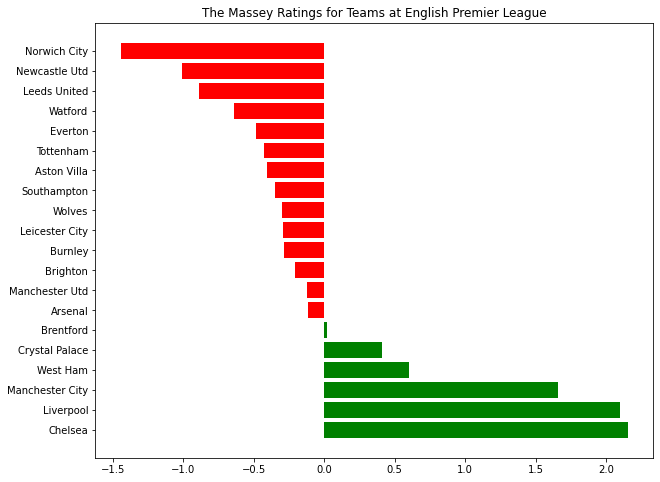

In [89]:
fig = plt.figure(figsize=(10,8))
c = ['green' if data.value >= 0 else 'red' for i, data in results.iterrows()]
plt.barh(results.team, results.value, align='center', color=c)
plt.title('The Massey Ratings for Teams at English Premier League')
fig.set_facecolor('white')
plt.show()